<a href="https://colab.research.google.com/github/numaaaann/machine-learning/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program use an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

#Importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df=yf.download('GOOG', start='2012-01-01', end='2023-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(3018, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

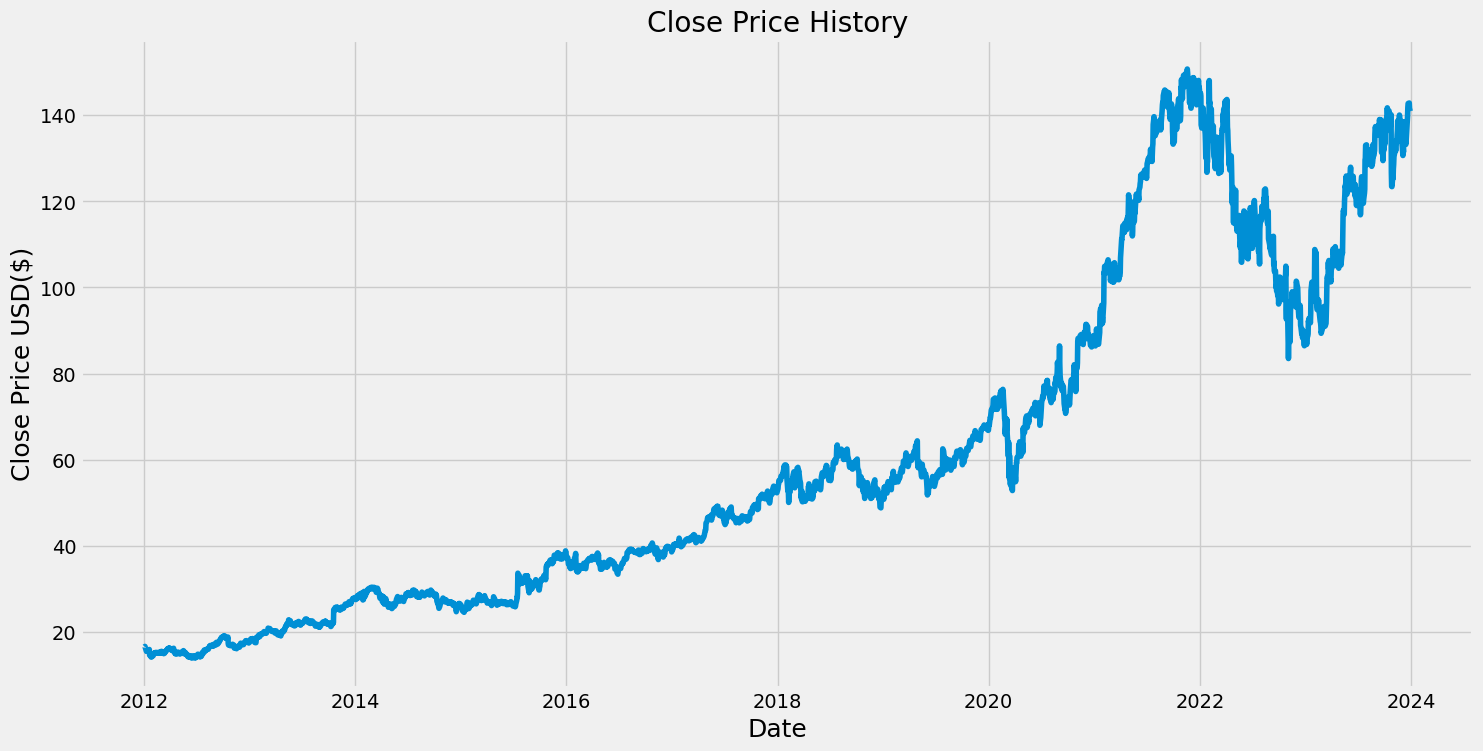

In [ ]:
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show

In [ ]:
#Create a new dataframe with omly the 'Close column'
data = df.filter(['Close'])

In [ ]:
#Convert the dataframe to a numpy array
dataset = data.values

In [ ]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)


In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.93223671],
       [0.93106697],
       [0.92850816]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

In [ ]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474516, 0.00678818, 0.0091116 , 0.00868915,
       0.00924998, 0.00954313, 0.00853256, 0.00967788, 0.00923359,
       0.00846883, 0.00864363, 0.00830131, 0.01000563, 0.00890219,
       0.00856898, 0.00925908, 0.00915165, 0.01080499, 0.01077951,
       0.01153516, 0.01132576, 0.01005116, 0.00835958, 0.00869461,
       0.00875653, 0.00750196, 0.00839417, 0.01069392, 0.01036799,
       0.01130392, 0.01201587, 0.01364372, 0.01355449, 0.01473623,
       0.01584149, 0.01521148, 0.01643874, 0.01601812, 0.01760955])]
[0.01627122404731983]

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.00

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2355, 60, 1)

In [ ]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2355/2355 ━━━━━━━━━━━━━━━━━━━━ 69s 28ms/step - loss: 0.0015


In [ ]:
#Create a new array containing scaled values from index 2455 to 3018
test_data=scaled_data[training_data_len - 60: 3018]


In [ ]:
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:

#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [ ]:
#Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

0.7045759893768463

In [ ]:
#Plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-23-0e85bfe7d0c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


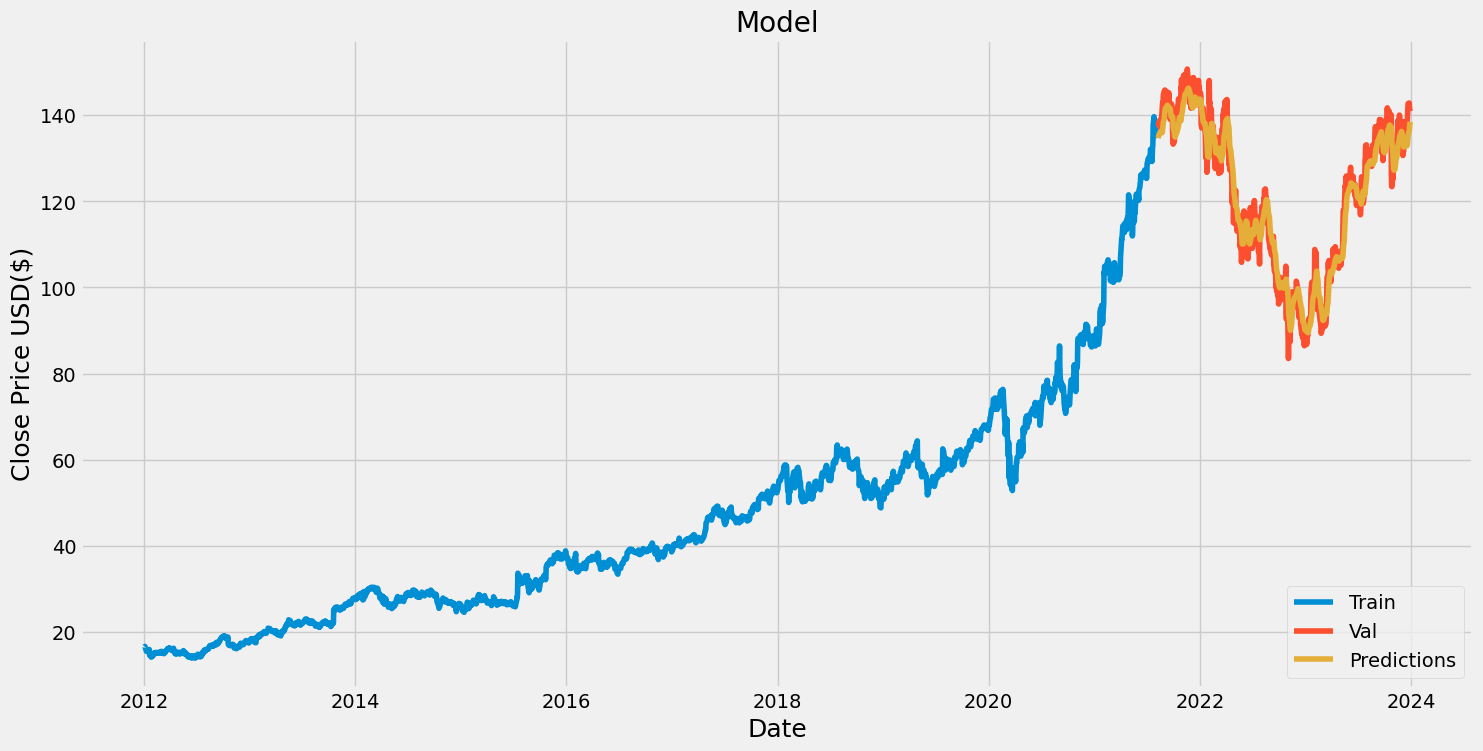

In [ ]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-09,138.001999,134.677139
2021-08-10,138.096497,134.935165
2021-08-11,137.689499,135.215179
2021-08-12,138.389496,135.427750
2021-08-13,138.406006,135.668640
...,...,...
2023-12-22,142.720001,135.352875
2023-12-26,142.820007,136.404282
2023-12-27,141.440002,137.372726


In [ ]:
#Get the quote
quote=yf.download('GOOG', start='2012-01-01', end='2024-04-07')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Create a new dataframe
new_df = quote.filter(['Close'])

In [ ]:
#Get the last 60 day closing prices values and convert the dataframe to an array
last_60_days=new_df[-60:].values

In [ ]:
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [ ]:
#Create an empty list
X_test = []

In [ ]:
#Append the past 60 days
X_test.append(last_60_days_scaled)

In [ ]:
#Convert the X_test data to a numpy array
X_test = np.array(X_test)

In [ ]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Get the predicted scaled price
pred_price = model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [ ]:
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[153.57608]]


In [ ]:
#Get the quote
quote2=yf.download('AAPL', start='2023-01-01', end='2024-05-08')
print(quote2['Close'])

NameError: name 'yf' is not defined

# New Section